 # Graduate Rotational Internship Program by The Sparks Foundation

### Author: Fahad Munir

### Task 4
## Exploratoy Data Analysis-Terrorism

This task is part of the internship with The Sparks Foundation. In this task we have to analyze the Global Terrorism dataset in order to find out hotpots of terrorism.


In [1]:
# Importing libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

!pip install folium
import folium
from folium.plugins import MarkerCluster

In [2]:
import csv

with open("E:\\The Sparks Foundation\\Global_Terrorism\\globalterrorismdb_0718dist.csv", "rt", encoding='latin-1') as infile, open("repaired.csv", "wt",encoding='latin-1') as outfile:
    reader = csv.reader(infile)
    writer = csv.writer(outfile)
    
    conversion = set('_"/.$')
    for row in reader:
        newrow = [''.join('_' if c in conversion else c for c in entry) for entry in row]
        writer.writerow(newrow)

In [3]:
#Reading data
terr_data = pd.read_csv(r'E:\The Sparks Foundation\\repaired.csv',encoding='latin-1')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,70,76,79,90,92,94,96,101,107,112,114,115,117,118,119,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
terr_data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
terr_data.describe()

,eventid,iyear,imonth,iday,extended,country,region,specificity,vicinity,crit1,...,nhostkidus,ndays,ransom,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181685.000000,181691.000000,181691.000000,...,13517.000000,8124.000000,77381.000000,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,1.451452,0.068297,0.988530,...,-0.353999,-32.516371,-0.145811,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,0.995430,0.284553,0.106483,...,6.835645,121.209205,1.207861,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,-9.000000,0.000000,...,-99.000000,-99.000000,-9.000000,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,1.000000,0.000000,1.000000,...,0.000000,-99.000000,0.000000,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,1.000000,0.000000,1.000000,...,0.000000,-99.000000,0.000000,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,1.000000,0.000000,1.000000,...,0.000000,4.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,5.000000,1.000000,1.000000,...,86.000000,2454.000000,1.000000,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
terr_data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
terr_data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [8]:
terr_data2 = terr_data.copy()

In [9]:
terr_data2.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
terr_data2.dropna(axis=1, how='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,_Somalia: Al-Shabaab Militants Attack Army Che...,_Highlights: Somalia Daily Media Highlights 2 ...,_Highlights: Somalia Daily Media Highlights 1 ...,START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,_Putin's 'victory' in Syria has turned into a ...,_Two Russian soldiers killed at Hmeymim base i...,_Two Russian servicemen killed in Syria mortar...,START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"_Maguindanao clashes trap tribe members,_ Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"_Trader escapes grenade attack in Imphal,_ Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


## Renaming columns for easy understanding

In [11]:
terr_data2.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [12]:
# considering only the useful columns
terr_data2=terr_data2[['Year','Month','Day','Country','State','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [13]:
# filling the full null value with zero

terr_data2['Wounded']=terr_data2['Wounded'].fillna(0).astype(int)
terr_data2['Killed']=terr_data2['Killed'].fillna(0).astype(int)

In [14]:
# New Column Casualities
terr_data2['Casualities'] = terr_data2['Killed'] + terr_data2['Wounded']

In [15]:
terr_data2.head()

,Year,Month,Day,Country,State,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualities
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18_456792,-69_951164,Assassination,1,0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,1970,0,0,Mexico,Federal,North America,Mexico city,19_371887,-99_086624,Hostage Taking (Kidnapping),0,0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15_478598,120_599741,Assassination,1,0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,1970,1,0,Greece,Attica,Western Europe,Athens,37_99749,23_762728,Bombing_Explosion,0,0,U_S_ Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33_580412,130_396361,Facility_Infrastructure Attack,0,0,U_S_ Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0


In [16]:
terr_data2.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
State             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed              0
Wounded             0
Target            634
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
Casualities         0
dtype: int64

## Basic Data Analysis

In [17]:
!pip install wordcloud


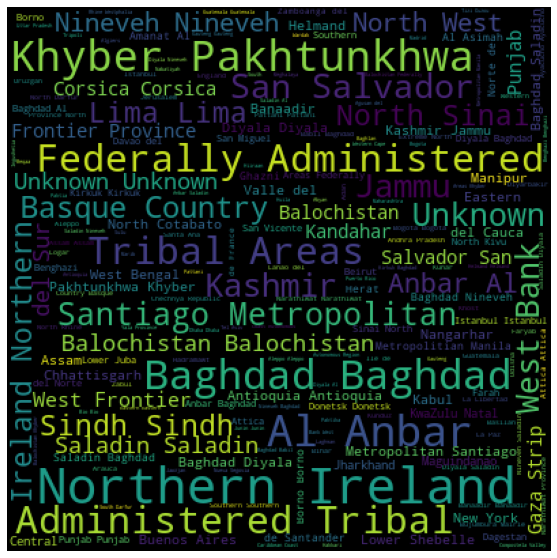

In [18]:
from wordcloud import WordCloud
from scipy import signal
cities = terr_data2.State.dropna(False)
plt.subplots(figsize=(10,10))
wc = WordCloud(background_color='black',width=400, height=400).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wc)
plt.show()

## From the wordcloud we can see, Northern Ireland, Santiago Metropoliton, Baghdad, Kashmir, Khyber Pakhtunkhwa, Jammu, Tribal Areas are mostly affected by terrorism.

### Number of Terrorist activities by year

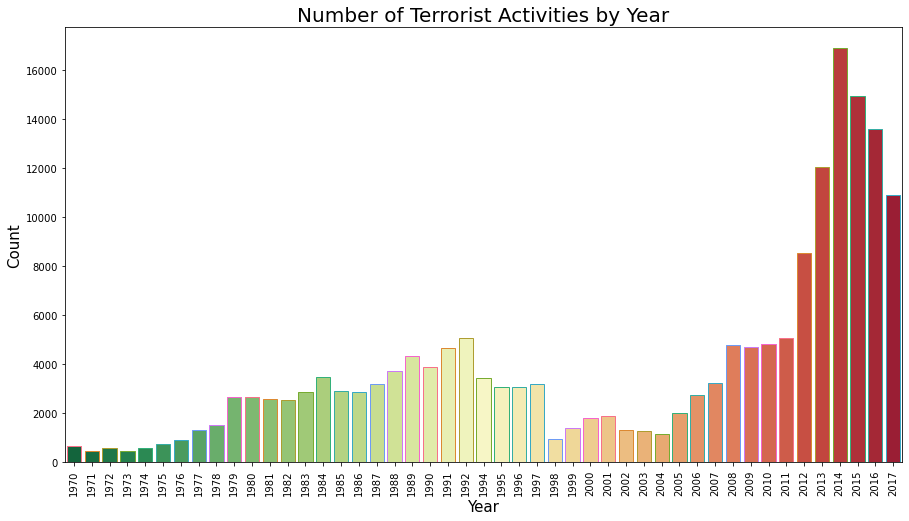

In [38]:
plt.subplots(figsize=(15,8))
sns.countplot('Year',data=terr_data2,palette='RdYlGn_r',edgecolor=sns.color_palette("husl", 10))
plt.xticks(rotation=90)
plt.title('Number of Terrorist Activities by Year',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

The plot shows, number of terrorist activities have been increased in recent years with highest activities occurred in 2014

### Attack Types used in terrorist incidents

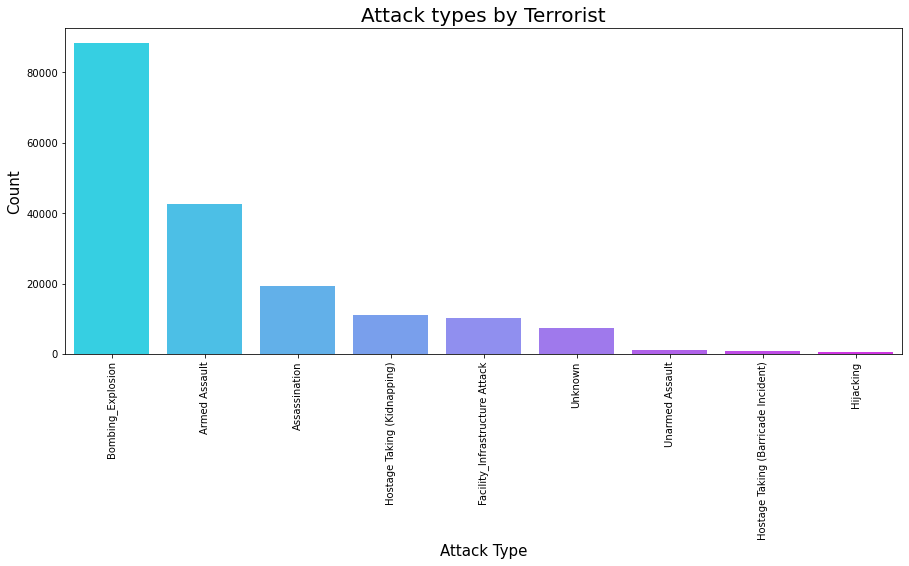

In [37]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terr_data2,palette='cool',order=terr_data2['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attack types by Terrorist',fontsize=20)
plt.xlabel('Attack Type',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

#### We can infer from the barplot, Bombing_explosion is the most used attack type by the terrorist followed by armed assault and assasination.

### Popular target of Terrorists

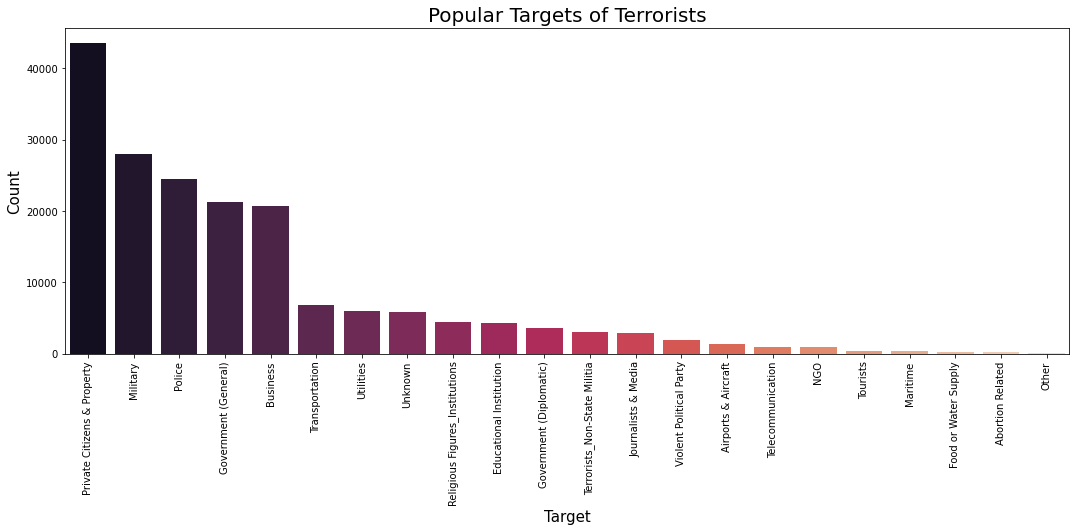

In [36]:
plt.subplots(figsize=(18,6))
sns.countplot('Target_type',data=terr_data2,palette='rocket',order=terr_data2['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Popular Targets of Terrorists',fontsize=20)
plt.xlabel('Target',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Private Citizens and Property is the most popular target for terrorists.

### Most affected Regions

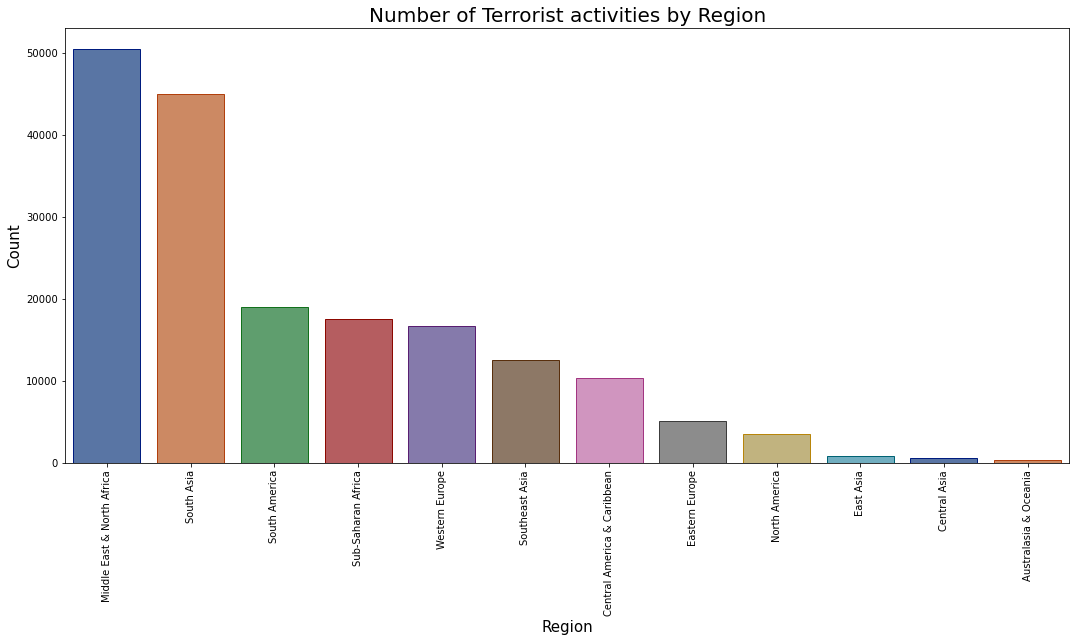

In [35]:
plt.subplots(figsize=(18,8))
sns.countplot('Region',data=terr_data2,palette='deep',edgecolor=sns.color_palette("dark", 10),order=terr_data2['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Terrorist activities by Region',fontsize=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

##### We can see MIddle East & North Africa is the most affected region.

## Terrorist activities by Region

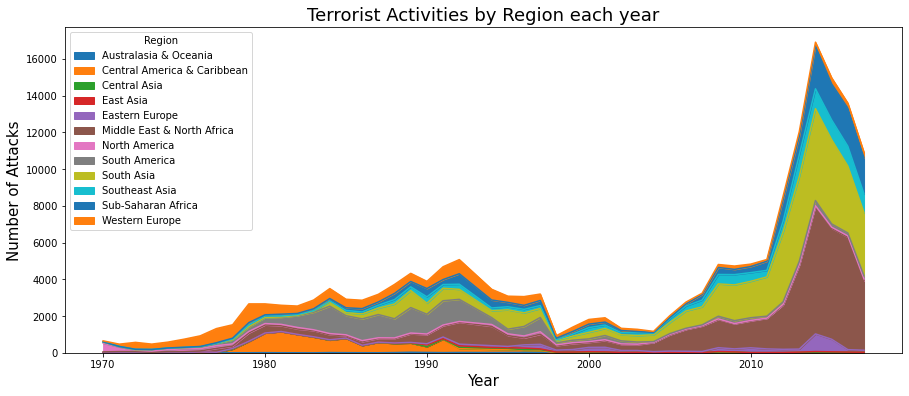

In [53]:
pd.crosstab(terr_data2.Year, terr_data2.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region each year', fontsize=18)
plt.xlabel('Year', fontsize= 15)
plt.ylabel('Number of Attacks', fontsize= 15)
plt.show()

### In recent years Middle East and South Asia are the victim of the most terrorirst attacks but during the 70's and 80's Central America and Western Europe were the main victim of terrorism. Also the number of terrorist attacks has been increased sharply after 2010 largely because of the increased terrorist activities in middle east for the regions' unsettled political environment.

## Top Affected Countries

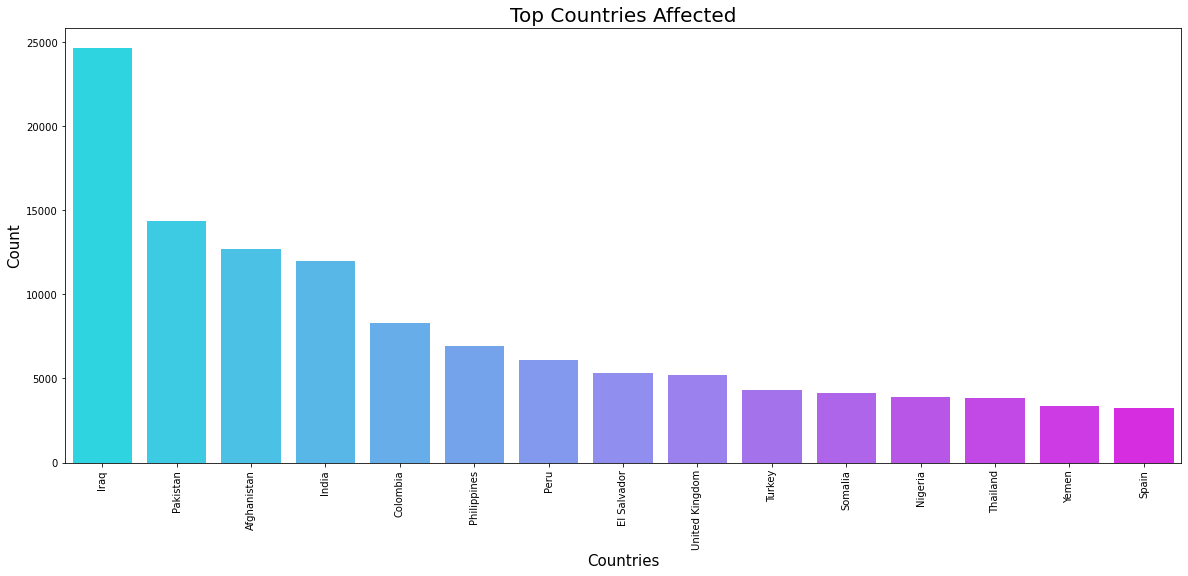

In [33]:
plt.subplots(figsize=(20,8))
sns.barplot(terr_data2['Country'].value_counts()[:15].index,terr_data2['Country'].value_counts()[:15].values,palette='cool')
plt.title('Top Countries Affected',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(rotation= 90)
plt.show()

#### From the above plot we can infer, war laden Iraq is the most affected country followed by Pakistan and Afganistan.

### Number of attacks and number of people killed

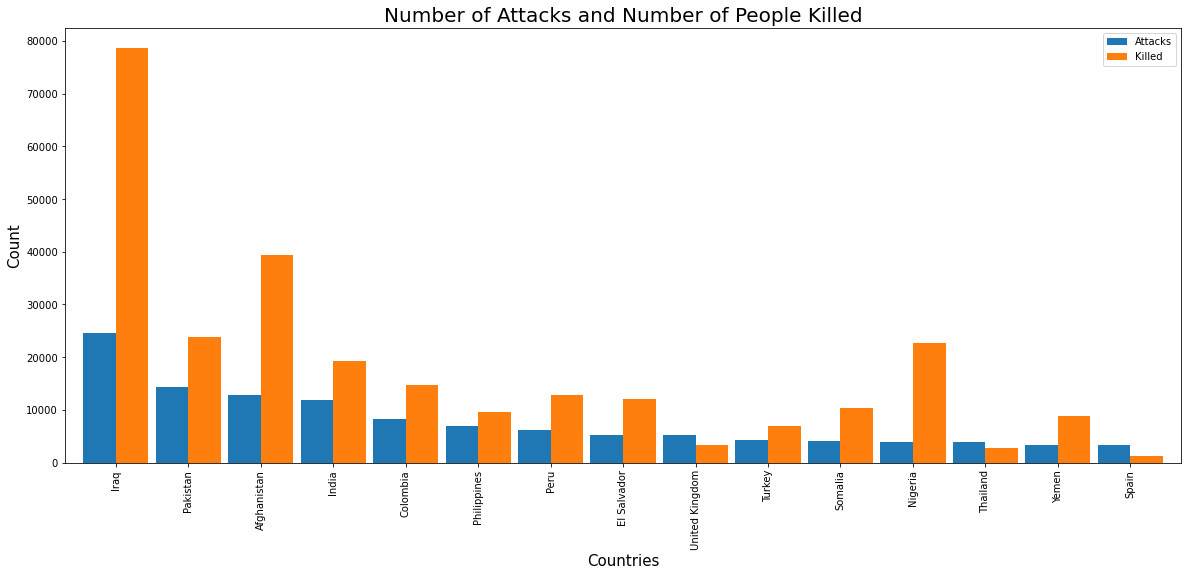

In [41]:
count_terror = terr_data2['Country'].value_counts()[:15].to_frame()
count_terror.columns=['Attacks']
count_kill=terr_data2.groupby('Country')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(20,8)
plt.title('Number of Attacks and Number of People Killed',fontsize=20)
plt.xlabel('Countries',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

### From the above barplot we can get a simple overview about how deadly terrorists attacks in Iraq that has taken thousands of lives.

## Terrorist Groups with Highest Terror Attacks  

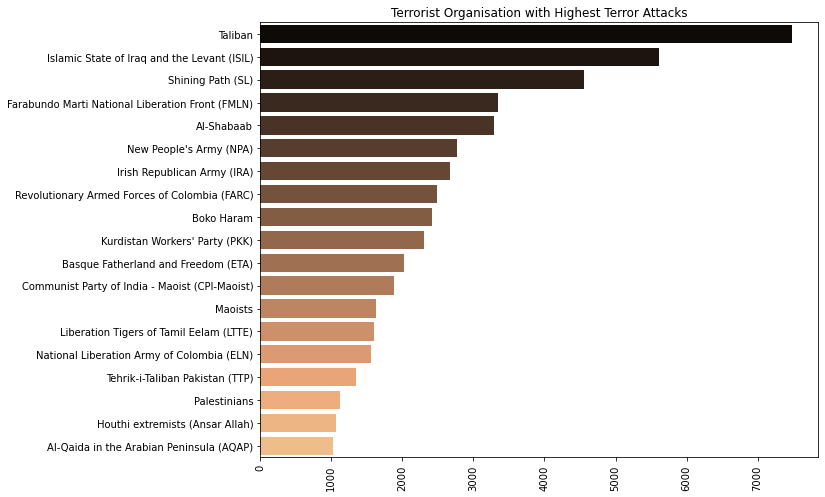

In [43]:
sns.barplot(terr_data2['Group'].value_counts()[1:20].values,terr_data2['Group'].value_counts()[1:20].index,palette=("copper"))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Organisation with Highest Terror Attacks')
plt.show()

Taliban seems to be the most active terror group.

## Motives behind Attack

In [46]:
from wordcloud import STOPWORDS

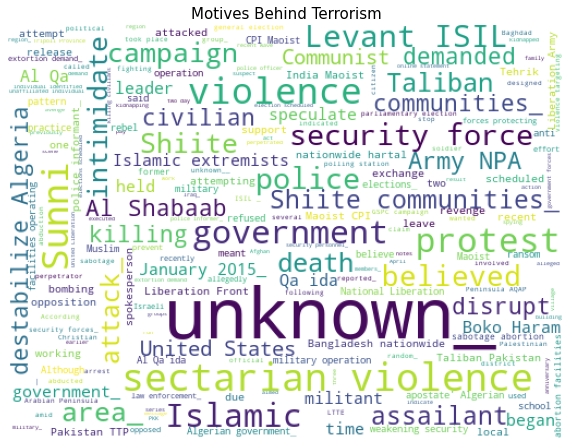

In [50]:
text = terr_data2.Motive.dropna()
text = " ".join(str(motive) for motive in terr_data2.Motive)
stopwords = set(STOPWORDS)
stopwords.update(["say","NaN","specific" ,"carried","incident","responsibility","claimed","noted","minority", "nothing",
                  "party","Party","noted","attack","motive","source","sources","stated","part","new", "us","The", "specific", "motive", "for",
                  "attack", "is", "unknown", "which", "Unknown","occurred", "occured","Occured", "state", "reported", "member", "group", "area", "related", "intended",
                  "larger","trend","may","target","targeted","suspected","speculated","retaliation","retalisation",
                  "says","call","unknown","nan","NAN","majority","communities","victim", "killed" ,"people", "posited",
                  "victims","attacks","response","United States","accused","iraq","note","stating",
                 "authorities","order","members"])
plt.subplots(figsize=(10,10))
wordcloud=WordCloud(stopwords=stopwords,background_color='white',width=512,height=382).generate(text)
plt.axis('off')
plt.title("Motives Behind Terrorism", fontsize=15)
plt.imshow(wordcloud)
plt.show()

### From the above wordcloud we can infer, most of the motives are unknown but from the known motives we can distiguish some common ones:
- Violance
- Governement
- Protest
- Sectarian Violance